<a href="https://colab.research.google.com/github/an-42-an/uidai1/blob/ananya/uidai1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!ls

sample_data


In [4]:
!git clone https://github.com/an-42-an/uidai1.git
%cd uidai1
!ls

Cloning into 'uidai1'...
remote: Enumerating objects: 30, done.
remote: Counting objects: 100% (30/30), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 30 (delta 14), reused 22 (delta 12), pack-reused 0 (from 0)
Receiving objects: 100% (30/30), 38.19 MiB | 24.15 MiB/s, done.
Resolving deltas: 100% (14/14), done.
Updating files: 100% (15/15), done.
/content/uidai1
api_data_aadhar_biometric    api_data_aadhar_enrolment	uidai1.ipynb
api_data_aadhar_demographic  README.md


In [6]:
!ls -R

.:
api_data_aadhar_biometric    api_data_aadhar_enrolment	uidai1.ipynb
api_data_aadhar_demographic  README.md

./api_data_aadhar_biometric:
bio1.csv  bio2.csv  bio3.csv  bio4.csv

./api_data_aadhar_demographic:
demo1.csv  demo2.csv  demo3.csv  demo4.csv  demo5.csv

./api_data_aadhar_enrolment:
enrol1.csv  enrol2.csv	enrol3.csv


In [1]:
import pandas as pd

In [5]:
enrol="api_data_aadhar_enrolment"
enrol1=pd.read_csv(f'{enrol}/enrol1.csv')
enrol1.head()

,date,state,district,pincode,age_0_5,age_5_17,age_18_greater
0,02-03-2025,Meghalaya,East Khasi Hills,793121,11,61,37
1,09-03-2025,Karnataka,Bengaluru Urban,560043,14,33,39
2,09-03-2025,Uttar Pradesh,Kanpur Nagar,208001,29,82,12
3,09-03-2025,Uttar Pradesh,Aligarh,202133,62,29,15
4,09-03-2025,Karnataka,Bengaluru Urban,560016,14,16,21


In [10]:
enrol1.dtypes

,0
date,object
state,object
district,object
pincode,int64
age_0_5,int64
age_5_17,int64
age_18_greater,int64


In [7]:
bio="api_data_aadhar_biometric"
bio1=pd.read_csv(f'{bio}/bio1.csv')
bio1.head()

,date,state,district,pincode,bio_age_5_17,bio_age_17_
0,01-03-2025,Haryana,Mahendragarh,123029,280,577
1,01-03-2025,Bihar,Madhepura,852121,144,369
2,01-03-2025,Jammu and Kashmir,Punch,185101,643,1091
3,01-03-2025,Bihar,Bhojpur,802158,256,980
4,01-03-2025,Tamil Nadu,Madurai,625514,271,815


In [8]:
demo="api_data_aadhar_demographic"
demo1=pd.read_csv(f'{demo}/demo1.csv')
demo1.head()

,date,state,district,pincode,demo_age_5_17,demo_age_17_
0,01-03-2025,Uttar Pradesh,Gorakhpur,273213,49,529
1,01-03-2025,Andhra Pradesh,Chittoor,517132,22,375
2,01-03-2025,Gujarat,Rajkot,360006,65,765
3,01-03-2025,Andhra Pradesh,Srikakulam,532484,24,314
4,01-03-2025,Rajasthan,Udaipur,313801,45,785


In [15]:
def sp_low(df,cols):
  df[cols]=df[cols].apply(lambda s:s.astype(str).str.replace(' ','',regex=False).str.lower())
  return df

In [9]:
import glob
import matplotlib.pyplot as plt

In [16]:
biofiles=glob.glob("api_data_aadhar_biometric/bio*.csv")
biodf=pd.concat(pd.read_csv(f) for f in biofiles)
biodf['date']=pd.to_datetime(biodf['date'],dayfirst=True)
biodf['year_month']=biodf['date'].dt.strftime('%Y-%m')
biodf=sp_low(biodf,['state','district'])
bioage=[c for c in biodf.columns if 'age' in c]
biog=biodf.groupby(['state','year_month'])[bioage].sum().reset_index()

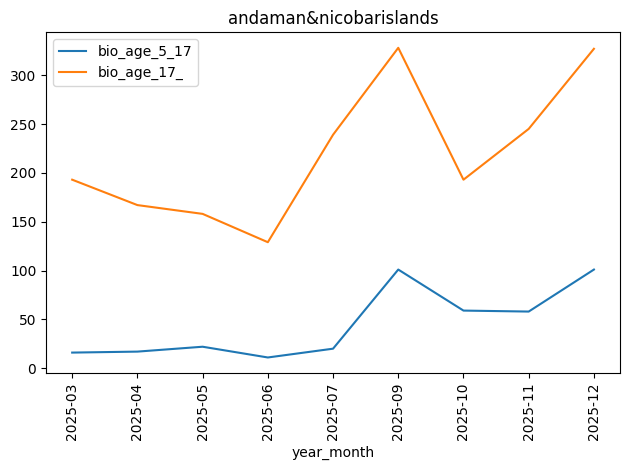

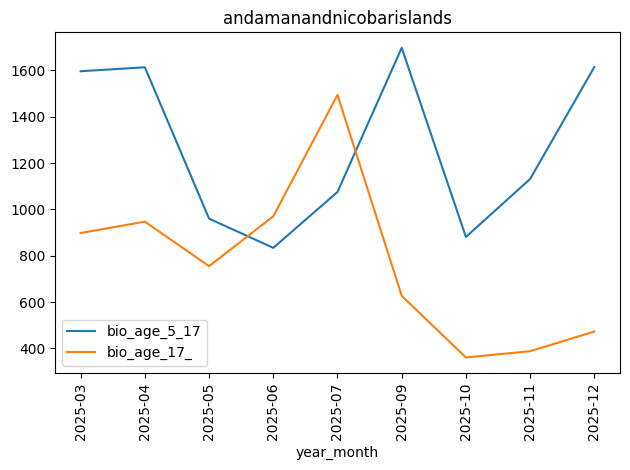

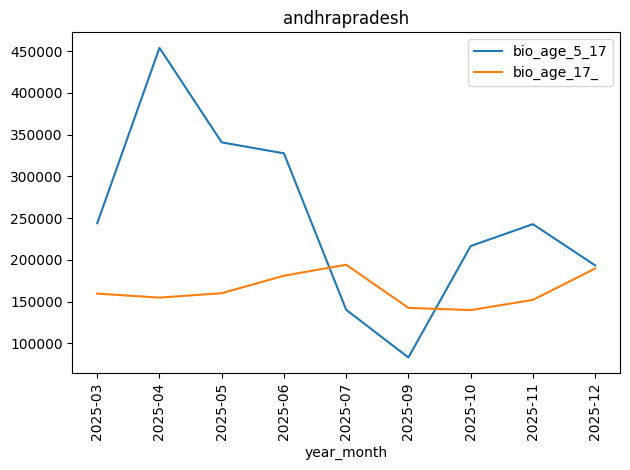

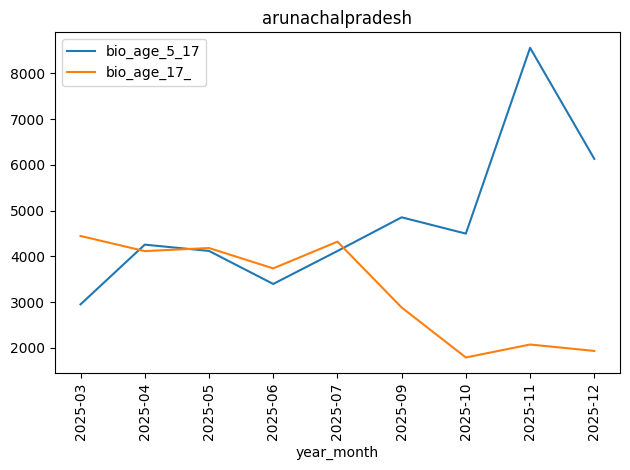

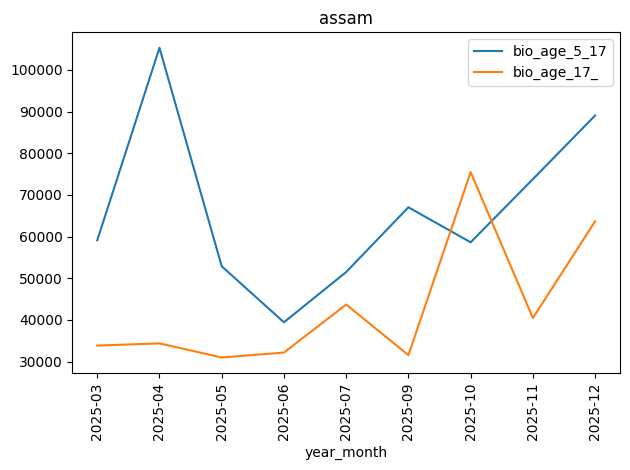

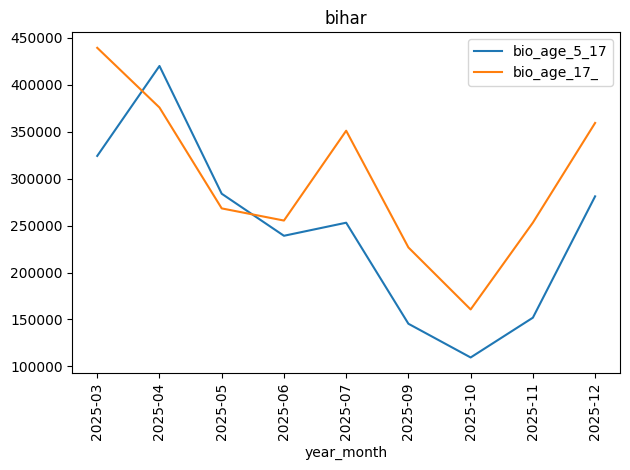

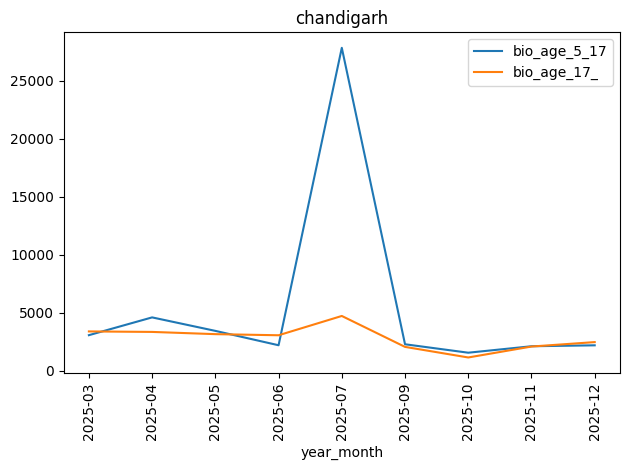

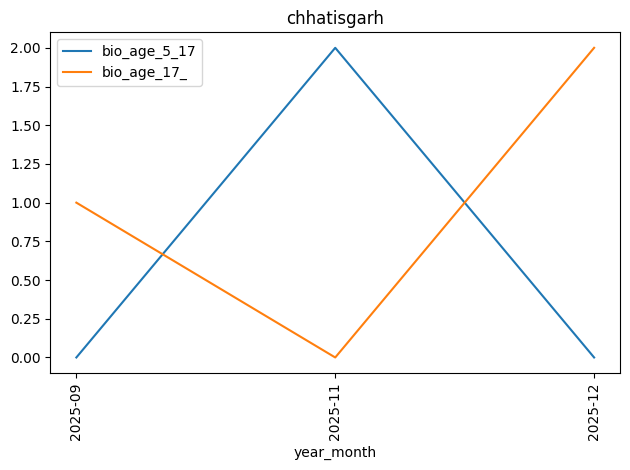

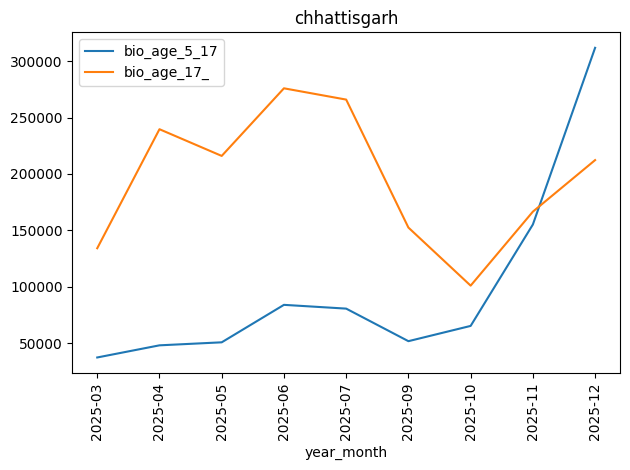

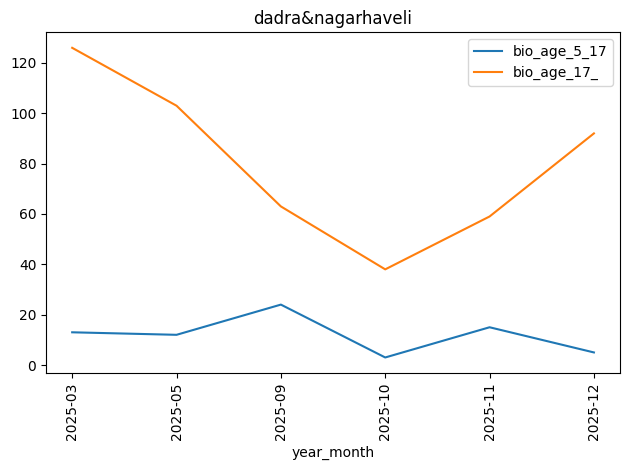

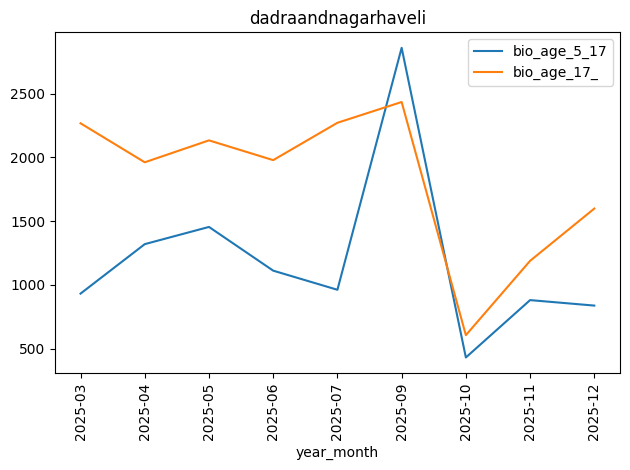

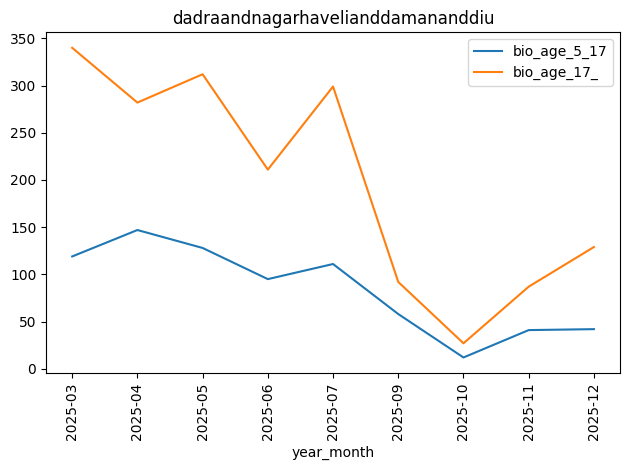

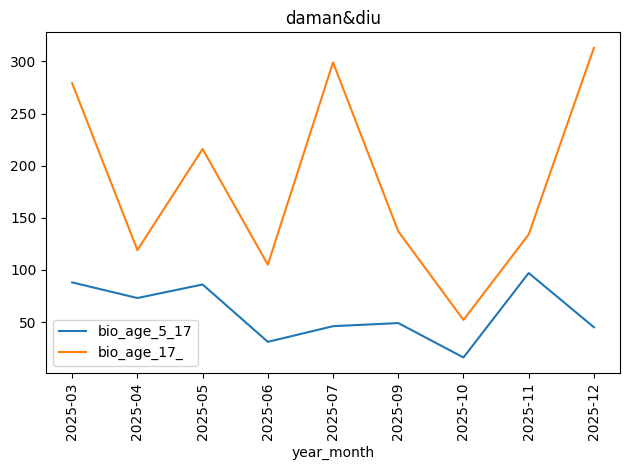

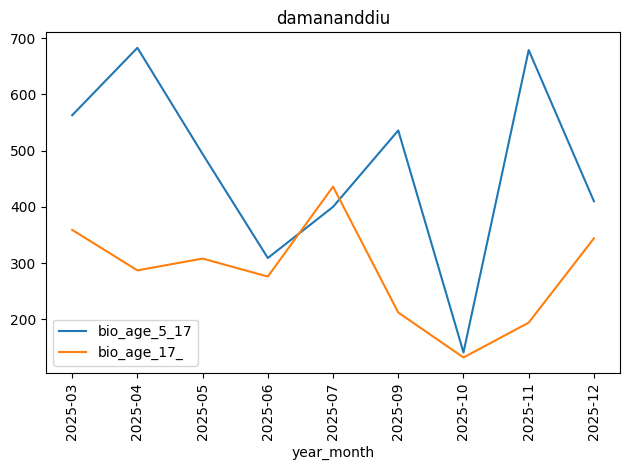

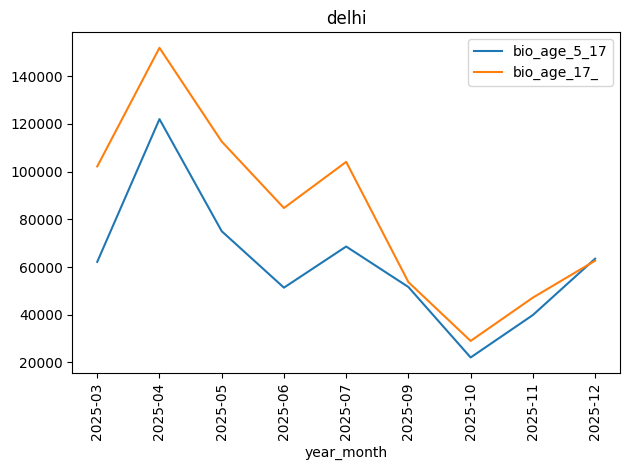

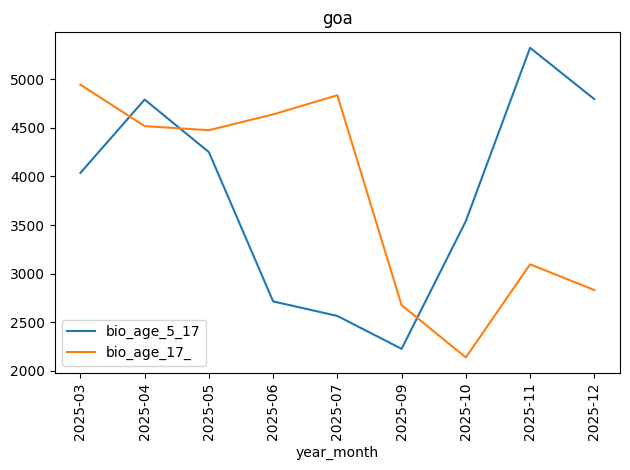

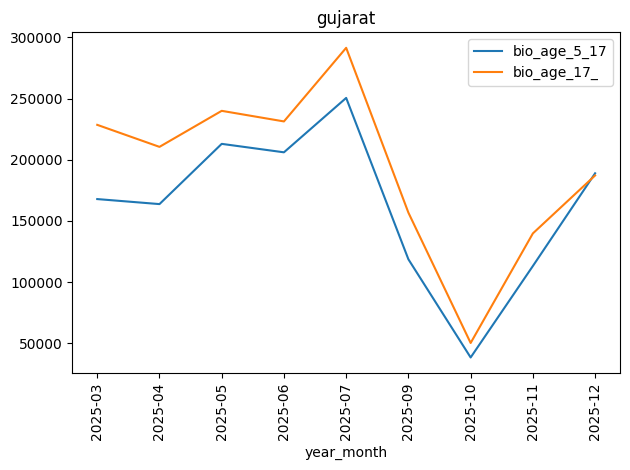

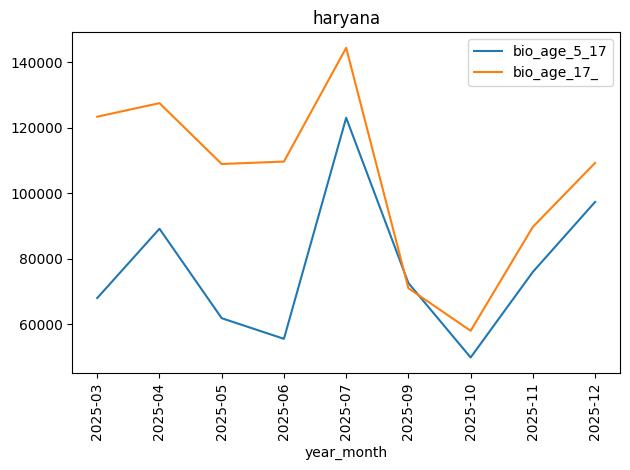

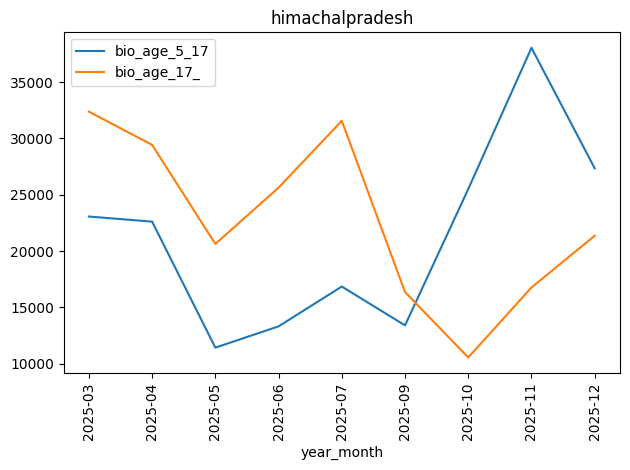

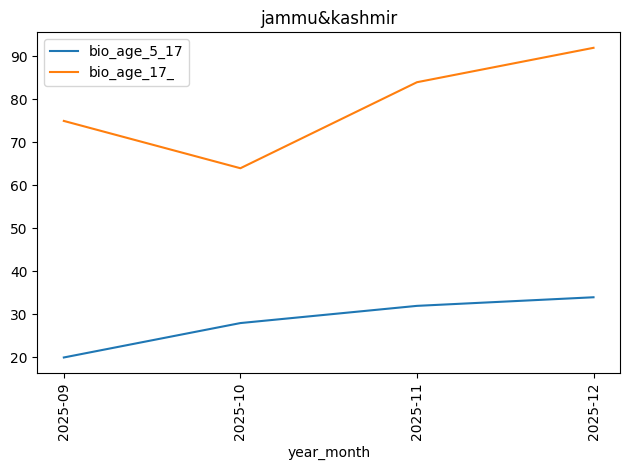

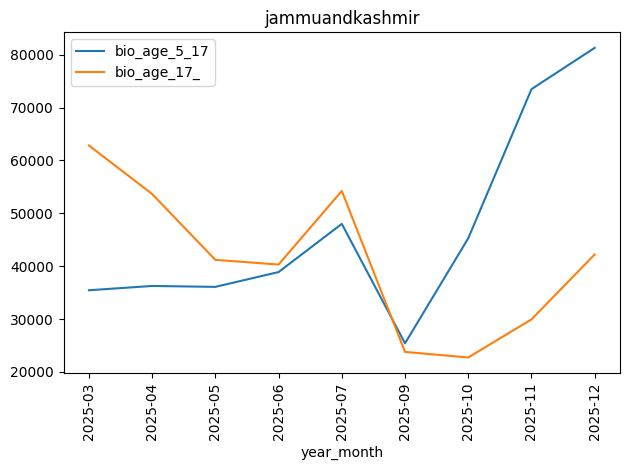

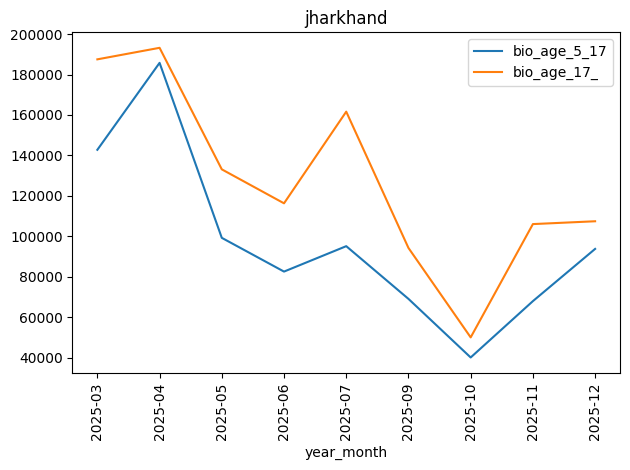

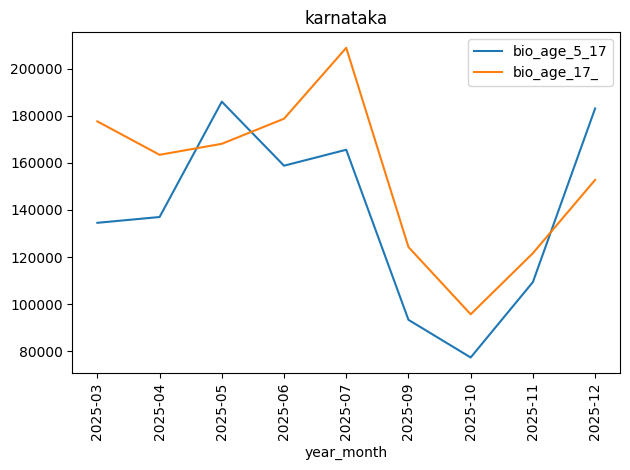

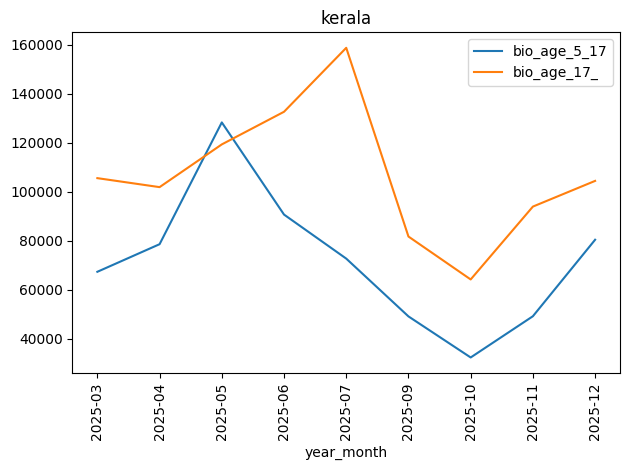

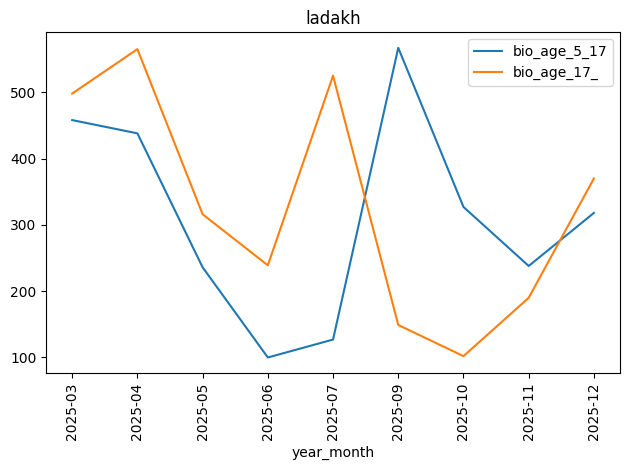

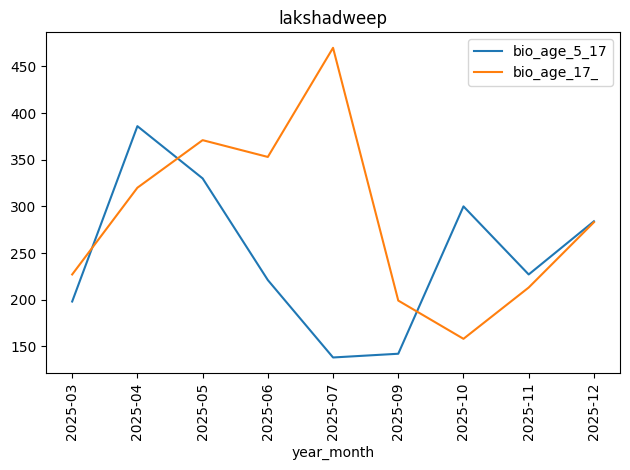

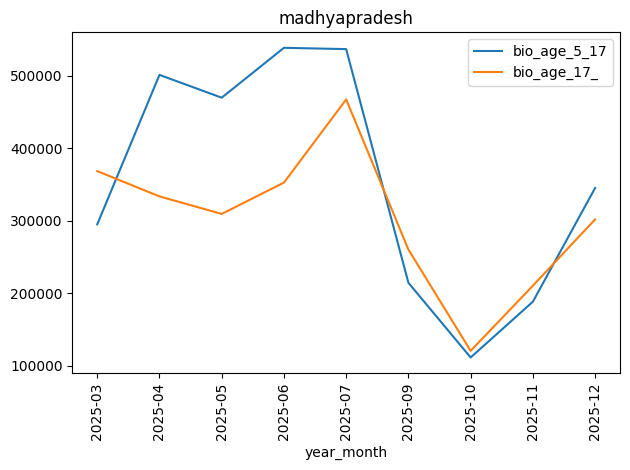

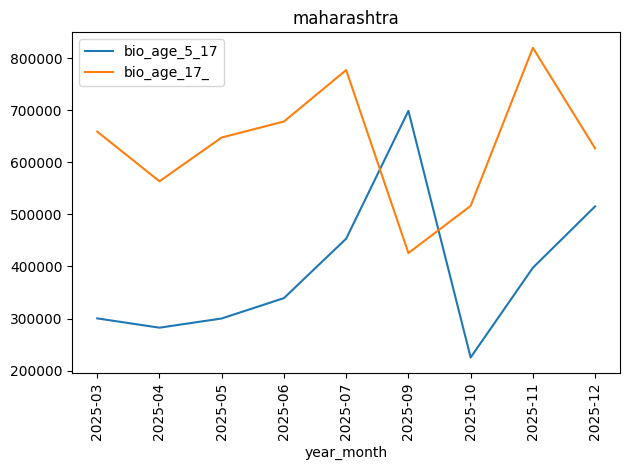

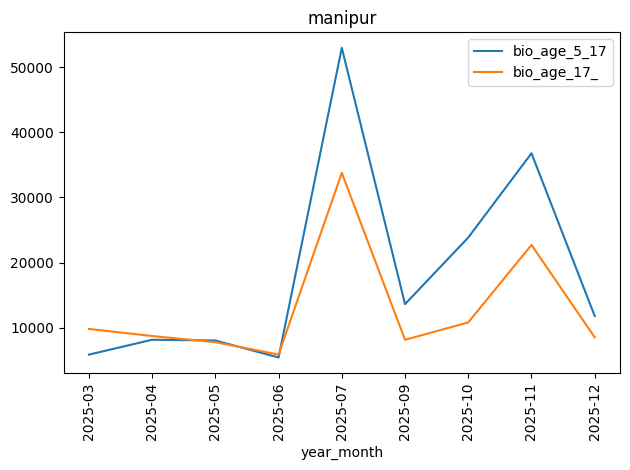

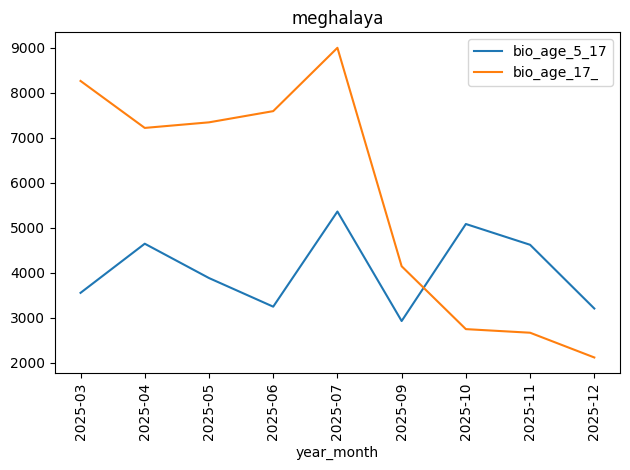

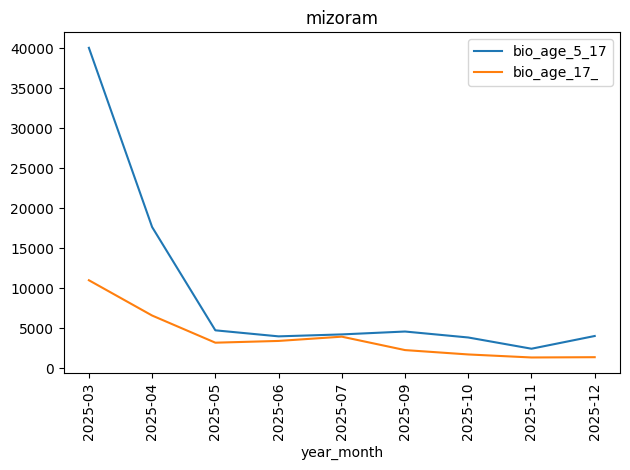

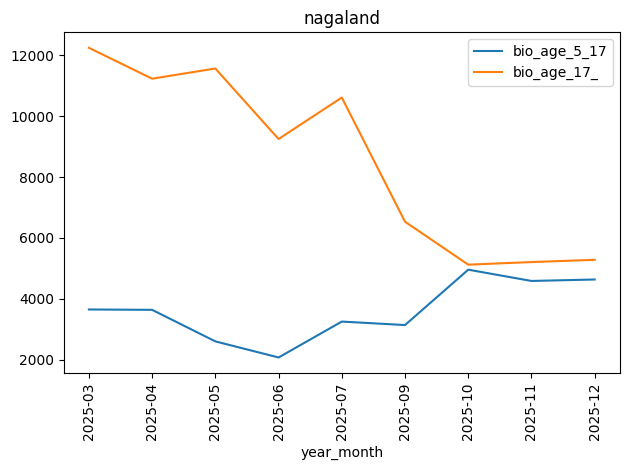

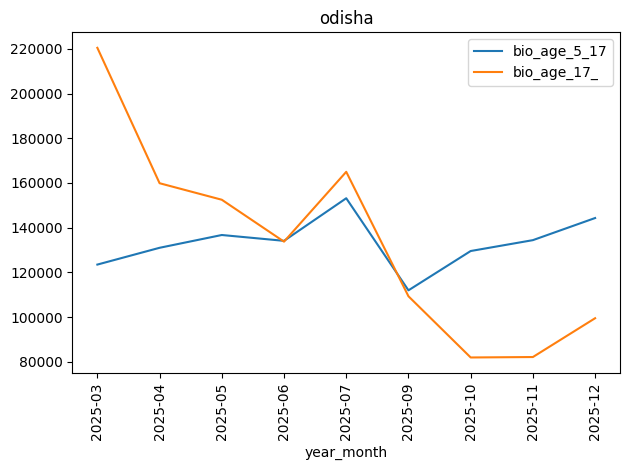

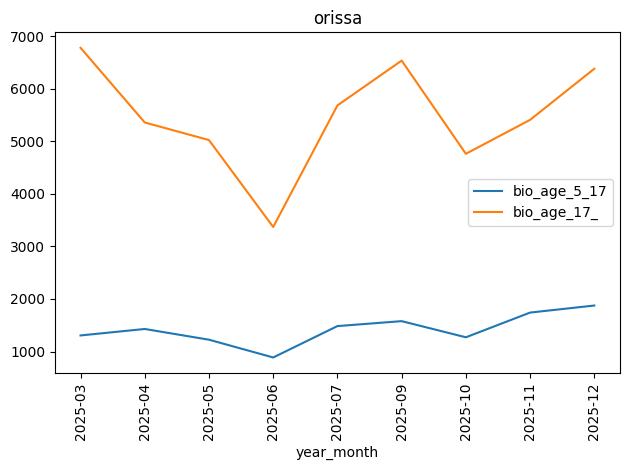

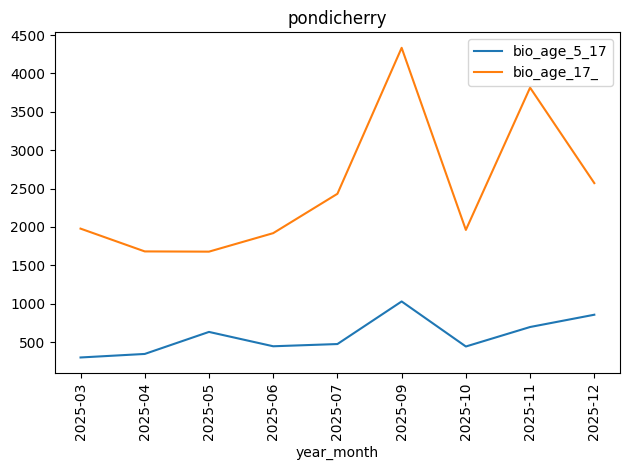

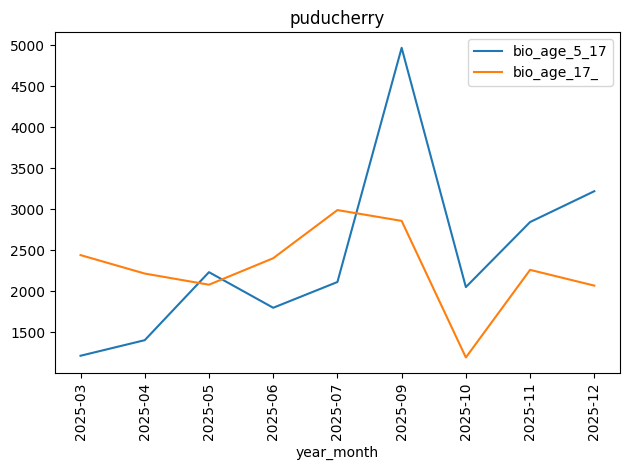

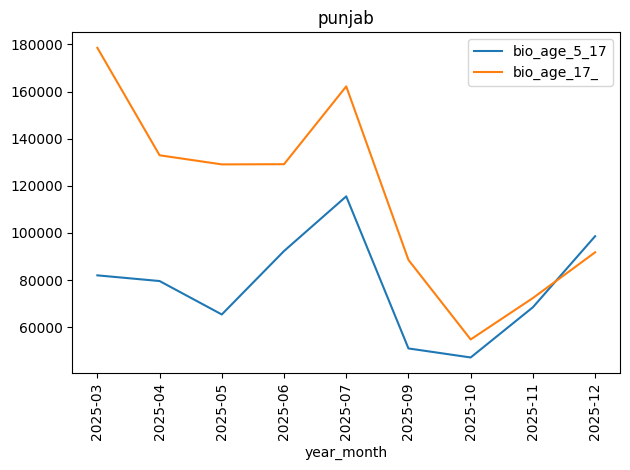

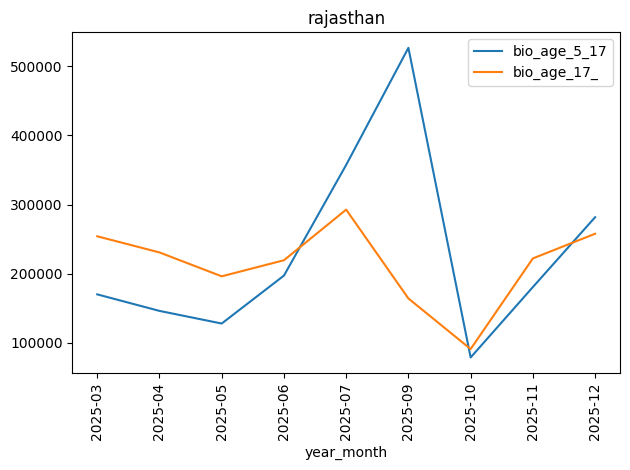

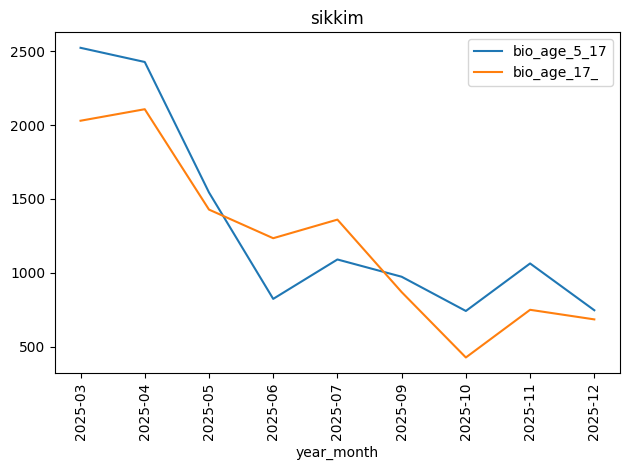

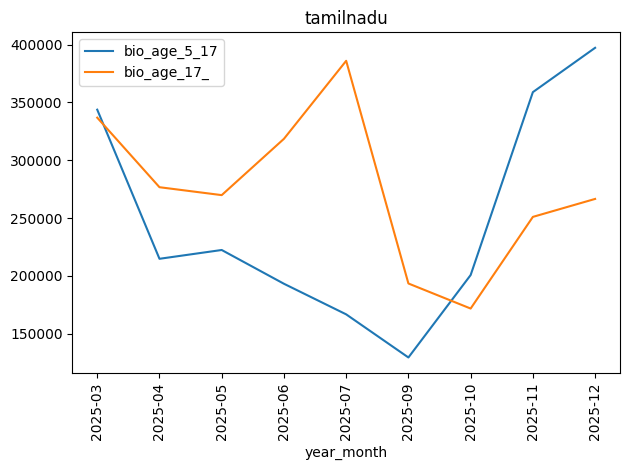

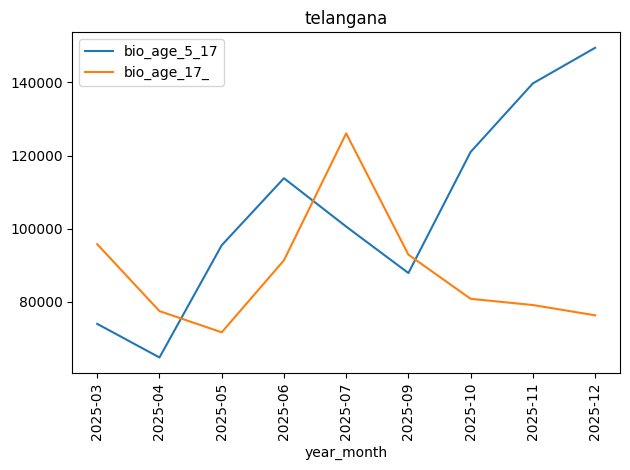

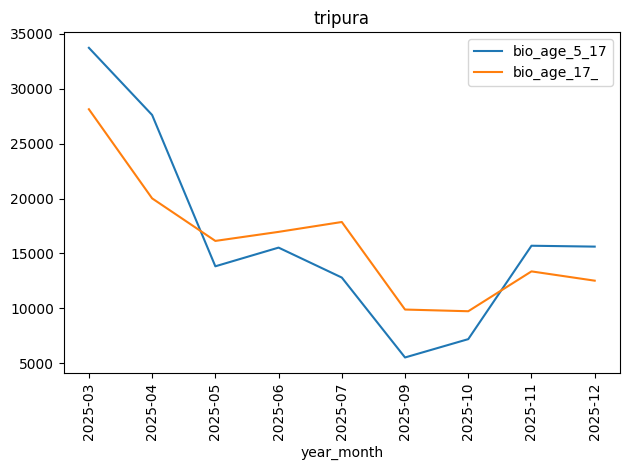

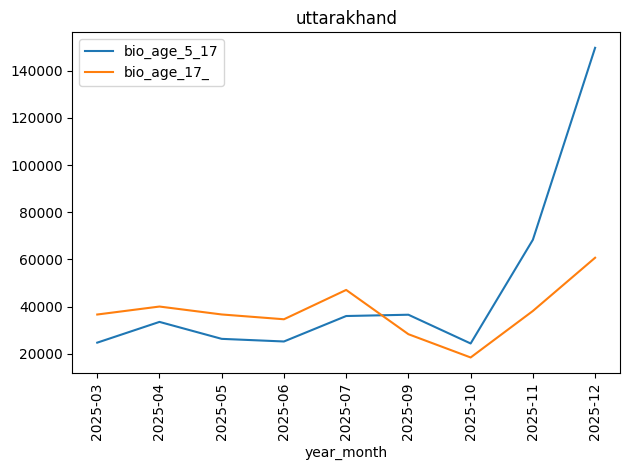

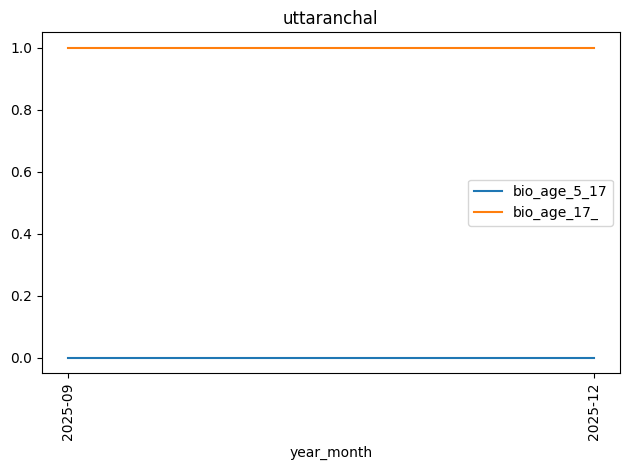

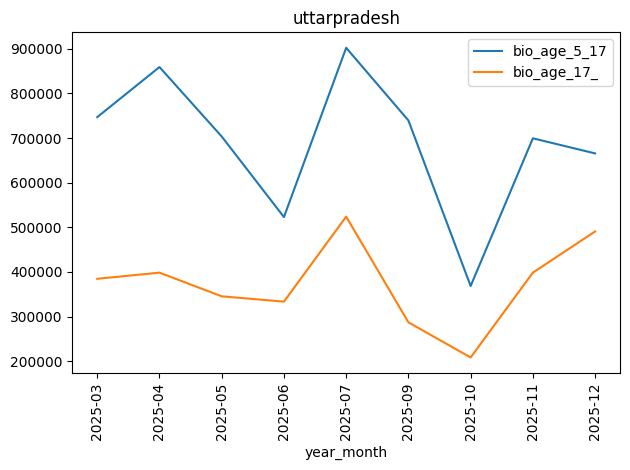

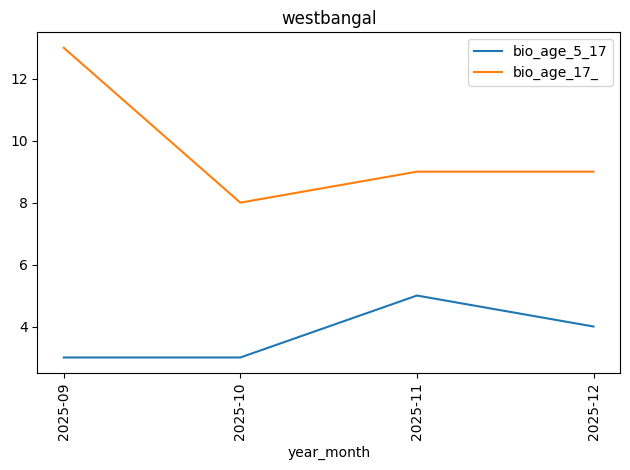

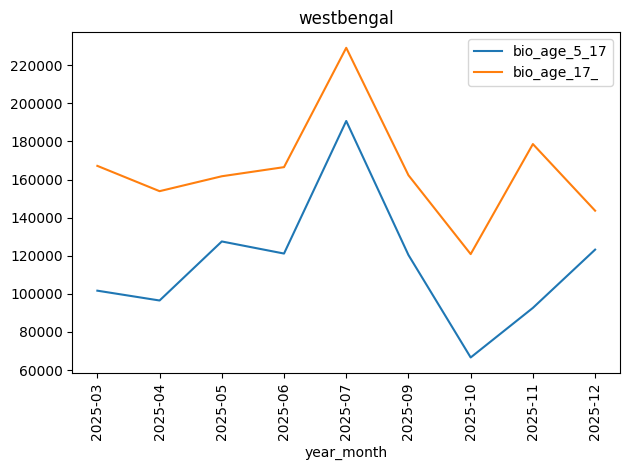

In [19]:
for state,d in biog.groupby('state'):
  d.plot(x='year_month',y=bioage,title=state)
  plt.xticks(range(len(d['year_month'])),d['year_month'],rotation=90)
  plt.tight_layout()
  plt.show()